In [8]:
import sys
sys.path.append('../src')

from torchvision.transforms import v2
from modules import dataset
import matplotlib.pyplot as plt

/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lexyo/.config/matplotlib is not a writable directory
Matplotlib created a temporary cache directory at /tmp/matplotlib-j4q4gj21 because there was an issue with the default path (/home/lexyo/.config/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


/home/lexyo/Dev/cv-proj2/notebooks/../src/modules/paths.py


Loading dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/train.pkl


/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_geometry.py:309: UserWarning: Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.
  warnings.warn("Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.")


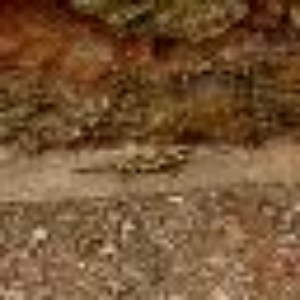

In [9]:
visualize = v2.Compose([v2.ToPILImage(), v2.Resize((300,300), antialias=False)])
image_per_class = dataset.load("train", tiny = True, start=1, stop=5)
visualize(image_per_class[4])["image"]

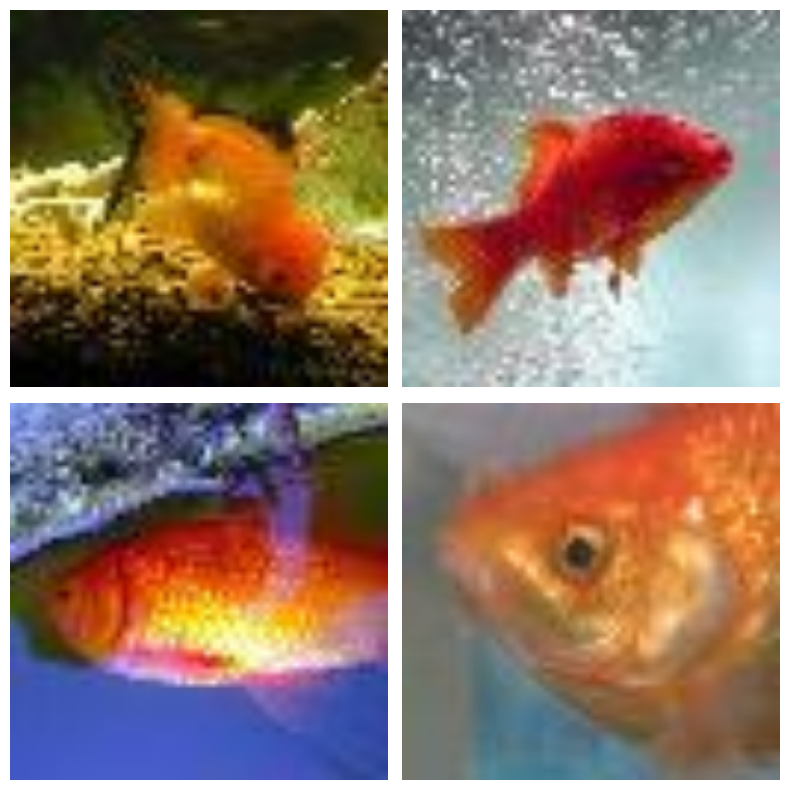

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Display each image in the grid
for i in range(4):
    img = visualize(image_per_class[i])["image"]  # Assuming this returns a PIL Image
    axes[i].imshow(img)
    axes[i].axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [11]:
image_per_class[0:3]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>],
 'label': [0, 0, 0]}

In [13]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Output PDF file
pdf_path = "all_classes_visualized.pdf"

# Create PDF
with PdfPages(pdf_path) as pdf:
    for class_idx in range(200):  # Iterate through all classes
        # Load 4 images for this class (adjust start/stop as needed)
        images = image_per_class[class_idx*4:class_idx*4+4]["image"]
        
        # Create a figure (adjust size to fit PDF page)
        fig = plt.figure(figsize=(8.27, 11.69), dpi=100)  # A4 size (landscape: 11.69, 8.27)
        plt.suptitle(f"Class {class_idx}", fontsize=14, y=0.95)
        
        # Add 2x2 grid of images
        for i in range(4):
            ax = fig.add_subplot(2, 2, i+1)
            img = visualize(images[i])  # Apply your transform
            ax.imshow(img)
            ax.axis("off")
        
        # Adjust layout and save to PDF
        plt.tight_layout(rect=[0, 0, 1, 0.93])  # Leave space for title
        pdf.savefig(fig, bbox_inches="tight")
        plt.close()

print(f"PDF saved to {pdf_path}")

/home/lexyo/Dev/cv-proj2/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/functional/_geometry.py:309: UserWarning: Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.
  warnings.warn("Anti-alias option is always applied for PIL Image input. Argument antialias is ignored.")


PDF saved to all_classes_visualized.pdf


In [6]:
classes = """red fish
salamander
frog 1
frog 2
crocodile
snake
fossil
scorpion
spider
tarantula
centipede
koala
medusa
coral
snail(without shell)
lobster
lobster
Black-necked stork
penguin
albatro
dolphin(?)
yorkshire
golden retriver
labrador
german shepherd
Large poodle
cat 1
cat 2
cat 3
tiger
leon
bear
Ladybugs
cricket
Bacillus rossius
cockroach
mantis
dragonfly
butterfly
leaf butterfly
marine worm
rabbit
pig
cow
buffalo
ovis
darling
gazelle
camel
mokey 1
monkey 2
monkey 3
elephant
red panda
abacus
graduate
altar
backpack
stairs
barber
house
barrel
basketball
bathub
car
lighthouse
becker
beer
bikini
binoculars
bird house
stravagante
geroglyphs
bucket
train modern
meat
holidays
cannon
woman sweater
ATM
CD Player
chest
chirstmas sock
cave
keyboard
candies
car without roof
crane
panorama
monitor
dining table
gym
flag
fly
fountain
train cargo
pan
fluffy jacket
gas mask
go kart
boat"""
classes_stripped = classes.split("\n")
class_to_label = {i:label for i, label in enumerate(classes_stripped)}

Loading dataset from /home/lexyo/Dev/cv-proj2/notebooks/../data/train.pkl
boat


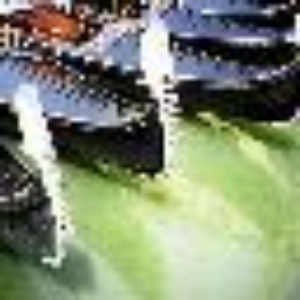

In [19]:
visualize = v2.Compose([v2.ToPILImage(), v2.Resize((300,300), antialias=False)])
image_per_class = dataset.load("train")
sample = visualize(image_per_class[500*100+10])
print(class_to_label[sample["label"]])
sample["image"]